In [1]:
import pydriller

In [2]:
repo = pydriller.Repository('../mastodon')

In [78]:
import pandas

In [83]:

# Input
data_file = 'change_log.csv'

# Delimiter
data_file_delimiter = ','

# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter)) + 1

        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]
column_names[0] = "filenames"

# Read csv
df = pandas.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names, index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
filenames,,,,,,,,,,,,,,,,,,,,,
.gitignore,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
misc.xml,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modules.xml,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vcs.xml,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
battleship_royal.iml,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Main.java,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Coordinates.java,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CoordinatesOutOfBoundsException.java,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grid.java,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


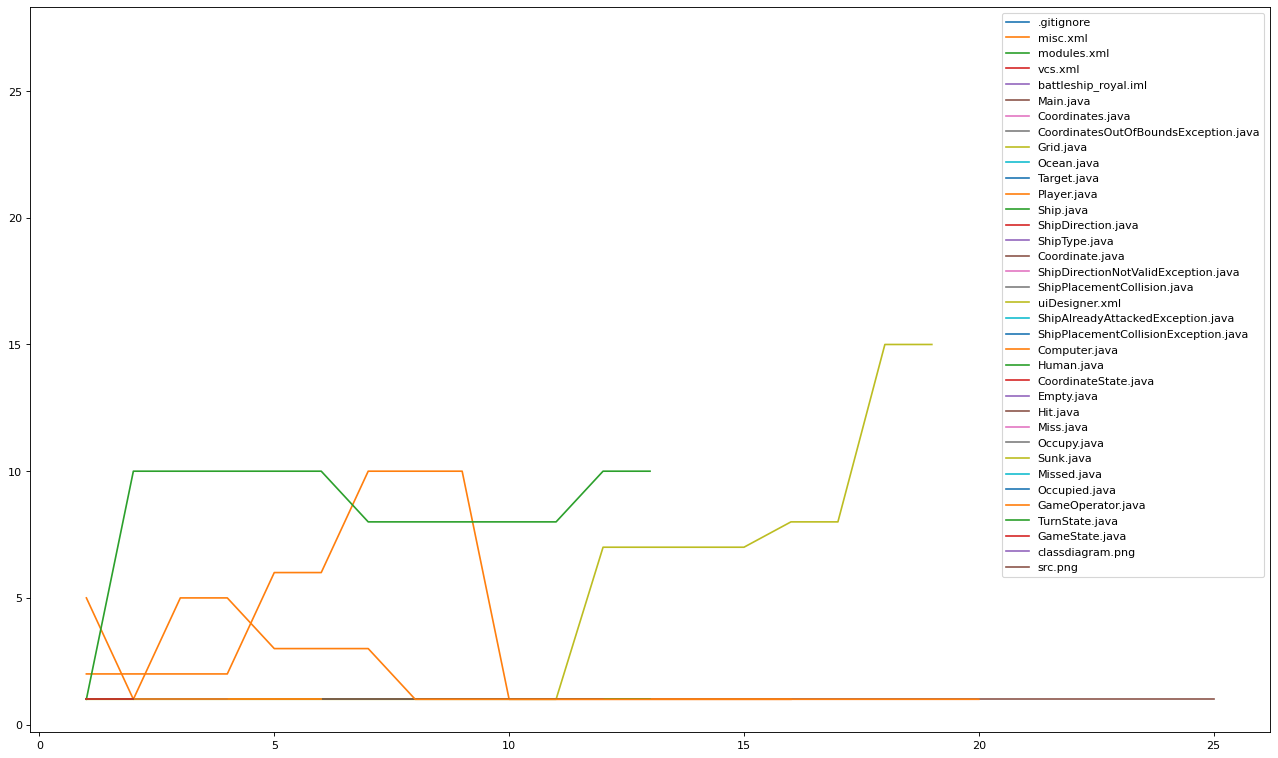

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12), dpi=80)
for index, column in df.iterrows():
    plt.plot(column, label=index)
plt.legend()

plt.savefig("graph.pdf")
plt.show()

In [1]:
def _count_lines(content: str) -> int:
    lines = content.split('\\n')
    while '' in lines:
        lines.remove('')
    return len(lines)

In [18]:
from pydriller import Repository
import csv
import pandas as pd

path = "https://github.com/lutzidan/assignment1-sw-construction"
#header = ['commit', 'changed_files']
#header = ['filename']
data = {}

for commit in Repository(path).traverse_commits():
    for file in commit.modified_files:
        if data.get(file.filename) is None:
            data[file.filename] = {}
        data[file.filename][commit.hash] = _count_lines(str(file.source_code)) #nested dictionary

listed_data = []
for k, v in data.items():
    listed_data.append([k, v])

df_dict = pd.DataFrame.from_dict(data).T
df_dict = df_dict.T.fillna(method='ffill').T
df_dict = pd.DataFrame.from_dict(data).T
df_dict = df_dict.fillna(value=0)
df_dict

,f17b3b2176d1c10d0b87d386788eacc2d04513e5,c26d99758b7733522d8a866566dfc9fd5bea1e8c,06933e9b5735ed2a8dac76fb01b1163d5a092b4b,9c4177fa6ee8f1962ce40b2492fc935522a8e397,fe40e07741a0b198b92305fa35aebe196b1ffe76,67db6d94ce9b4c8665e49cd8d1531184d31d6ccf,a4f7dd54ee0475548d796217c52bc842f043554b,f00fa9659a100aabd663011ee05fa2922f79b945,f62809e62d7d765722bfa55df1912d58d5499037,8c397ebfbc371324420d7b1b9bd7c4854fe88475,...,daf37db6cf8144ce50f8c8885b0a877191cb3b24,195ff7d5503194be3f00a6a0d15c2a6d84a2d7d2,7fc35861ea8528c2303694018fae223fd7e39fcf,b1771dbcc60e5ed3e12042f1c1e4b5fbff980d8a,0ed88447ad70537c6ccd299068c5a03bbcb26492,1382936cfe9371a9133b1e2bb67580384b45e5c5,c471bf128bf187f89139352294f24f7157cef9b4,b8d85b2c1c0534519b0dd0f8c660daaf71aecea3,0e31cbfa602e13f06cf3c6af0c78af54e590c035,5c43c5da1a89430c6b7431eb112576ffd34e9032
.gitignore,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
misc.xml,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
modules.xml,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vcs.xml,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
battleship_royal.iml,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Main.java,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coordinates.java,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CoordinatesOutOfBoundsException.java,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grid.java,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ocean.java,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


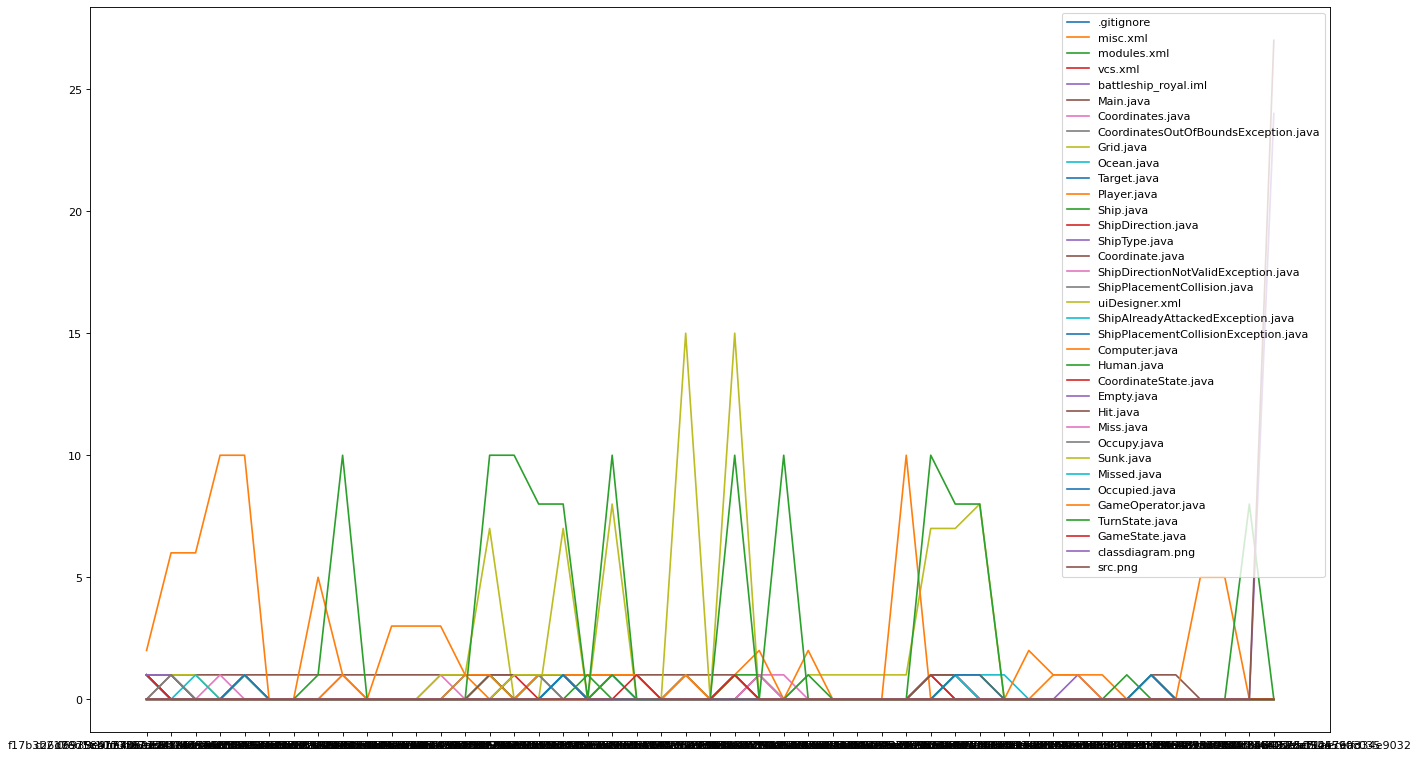

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12), dpi=80)
for index, column in df_dict.iterrows():
    plt.plot(column, label=index)
plt.legend()

plt.savefig("graph_dict.pdf")
plt.show()

In [37]:
df_dict = pd.read_csv("dict_frame_filtered.csv", index_col=0)
df_dict = df_dict.head(10)
df_dict = df_dict.loc[:, (df_dict != 0.0).any(axis=0)]
df_dict

,71fe24096c612996cb2a827c919a4c88ae1e3495,0e8f59c16fcb21301c736ecbc4424cb4c5388c42,6c4c84b161947cb11ad0451a39e26b25be4c93d5,447cfef62d74a670ddd600c0240f41746ac2fe0a,6deb9f966eb9a280cc16428ba9324ffc15ea60a8,fdc17bea58f210f62ac0d9e836b68e84c6dbd15c,f0de621e76b5a5ba3f7e67bd88c0183aac22b985,82aaedec467815c2947a11651d5216bb88ce4038,6d6a429af8fe4bd92ed497f401676353fdc603e0,e4af4898de8ab962bf39ced5d31d88e3fd510538,...,d4882aa64a7a483ec30ca61a507c2a6f5d3294f5,cb71c95e2292730befb8e12cf3b05d09d3e7443b,d890abfcab076f5df4eafb75397435d32c641e20,9ac7e6fef770c0627c14d704fdf525c9515d6a6c,74ead7d10698c7f18ca22c07d2f04ff81f419097,98b3b80d6bc6b8549448bb7fadc1449ba68a52ea,147d8bd8fc7aa8b55cd5a9103941c52441ed4365,11169367e4a999b19cc9140be38bdb5a1f3bb144,e0eb39d41b05115df973d5a9676b67a9309d4ff9,0cae6c07bb64b86bb1ac7188c11ddf182021aa5b
import_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
authorize_follow_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precompute_feed_service.rb,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
post_status_service.rb,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
account_search_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unsuspend_account_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
remove_featured_tag_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
after_block_domain_from_account_service.rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
block_domain_service.rb,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
block_service.rb,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


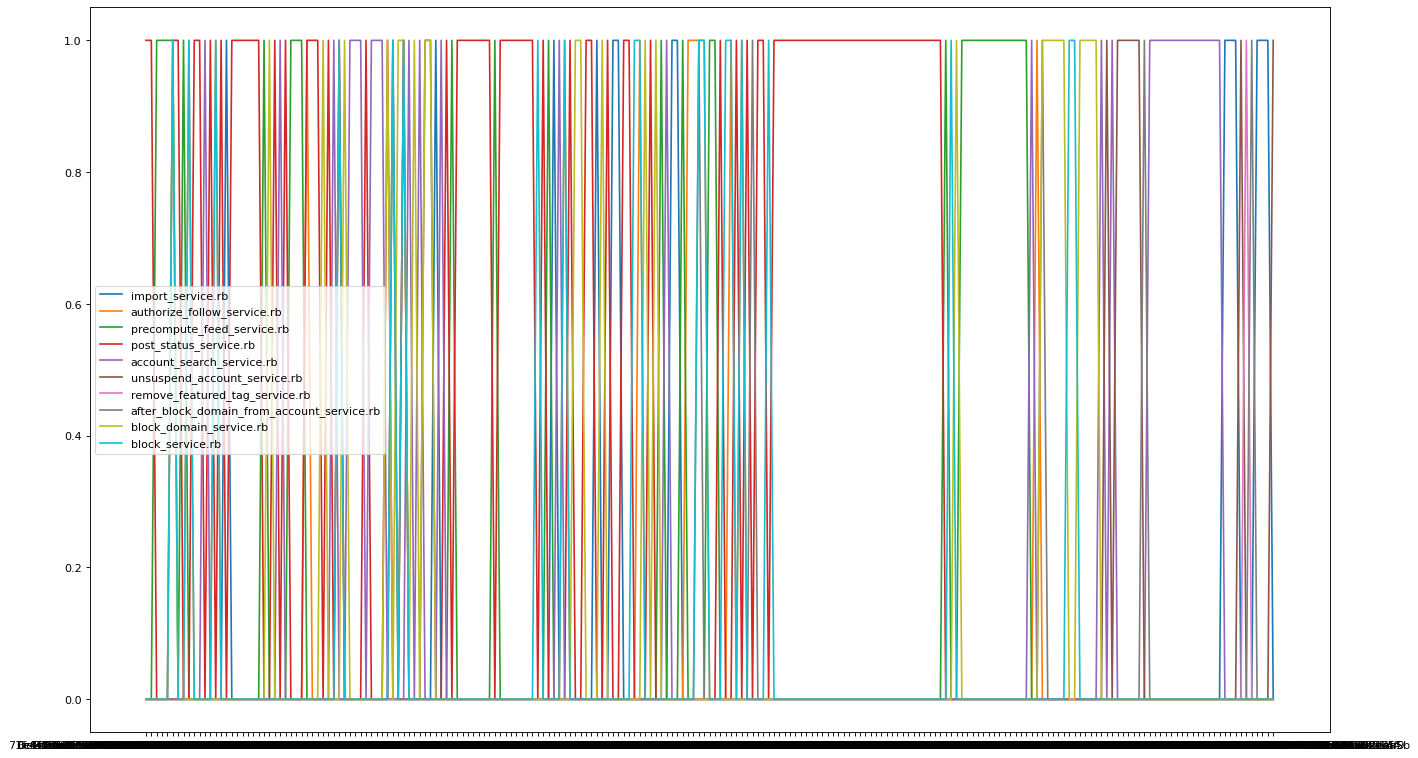

In [38]:
plt.figure(figsize=(20, 12), dpi=80)
for index, column in df_dict.iterrows():
        plt.plot(column, label=index)

plt.legend()
plt.savefig("graph_dict.pdf")
plt.show()